# **Principal Component Analysis Implementation**


# Part 1: Exploring Dataset

In [ ]:
import pandas as pd
import numpy as np
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS_COVID_Jan22.csv',
    index_col=0,
    thousands=','
)

In [ ]:
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649
Albania,0,0,0,0,0,0,0,0,0,0,...,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070
Algeria,0,0,0,0,0,0,0,0,0,0,...,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670
Andorra,0,0,0,0,0,0,0,0,0,0,...,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025
Angola,0,0,0,0,0,0,0,0,0,0,...,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,1991484,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583
Yemen,0,0,0,0,0,0,0,0,0,0,...,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585
Zambia,0,0,0,0,0,0,0,0,0,0,...,293695,295028,296132,296817,298032,299172,299971,300587,301203,301630


In [ ]:
country_list = cases_raw.index.to_list()

In [ ]:
type(country_list)

list

In [ ]:
df = cases_raw.transpose()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 2020-01-22 to 2022-01-23
Columns: 196 entries, Afghanistan to Zimbabwe
dtypes: int64(196)
memory usage: 1.1+ MB


In [ ]:
import matplotlib.pyplot as plt
def time_series_plot(df,top_countries):
  fig, axs = plt.subplots(2, 2, figsize=(15, 15))
  axs[0, 0].plot(df.index,df[top_countries[0]])
  axs[0, 0].set_title(top_countries[0])
  axs[0, 0].tick_params(axis='x', rotation=30)
  axs[0, 1].plot(df.index,df[top_countries[1]])
  axs[0, 1].set_title(top_countries[1])
  axs[0, 1].tick_params(axis='x', rotation=30)
  axs[1, 0].plot(df.index,df[top_countries[2]])
  axs[1, 0].set_title(top_countries[2])
  axs[1, 0].tick_params(axis='x', rotation=30)
  axs[1, 1].plot(df.index,df[top_countries[3]])
  axs[1, 1].set_title(top_countries[3])
  axs[1, 1].tick_params(axis='x', rotation=30)
  for ax in axs.flat:
      ax.set(xlabel='Time', ylabel='Number of Cases', xticks = np.arange(1,750,step=60))



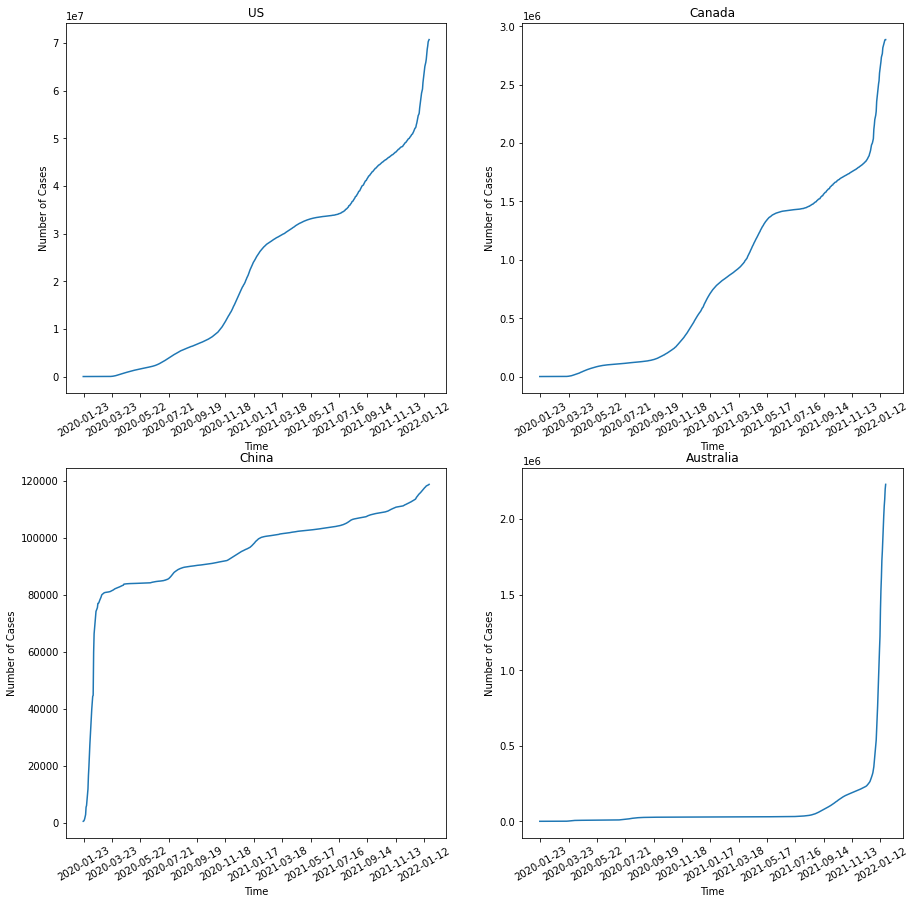

In [ ]:
top_countries = ['US', 'Canada', 'China', 'Australia']
time_series_plot(df, top_countries)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)
scaled_data1 = scaler.fit_transform(cases_raw)
scaled_df1 = pd.DataFrame(scaled_data1, index=cases_raw.index, columns=cases_raw.columns)

In [ ]:
scaled_data

array([[-1.25444724, -1.09986067, -1.32395787, ..., -1.16230918,
        -0.93904138, -0.80925163],
       [-1.25444724, -1.09986067, -1.32395787, ..., -1.16230918,
        -0.93904138, -0.80925163],
       [-1.25444724, -1.09986067, -1.32395787, ..., -1.16230918,
        -0.93904138, -0.80925163],
       ...,
       [ 1.58431287,  2.17955967,  1.76761494, ...,  1.82118894,
         2.42010331,  2.89213204],
       [ 1.58488235,  2.20950908,  1.79703695, ...,  1.82118894,
         2.42698729,  2.89567169],
       [ 1.58667975,  2.2317764 ,  1.8254343 , ...,  1.82118894,
         2.43175913,  2.89688946]])

In [ ]:
scaled_data[:, 0].mean(), scaled_data[:, 0].var()

(0.0, 0.9999999999999984)

In [ ]:
scaled_data.shape

(733, 196)

In [ ]:
scaled_df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,US,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,-1.254447,-1.099861,-1.323958,-1.192218,-0.988898,-0.755236,-1.096911,-1.302008,-0.339681,-1.054889,...,-0.851437,-1.222435,-1.275823,-0.939307,-1.099893,-0.490431,-1.084493,-1.162309,-0.939041,-0.809252
2020-01-23,-1.254447,-1.099861,-1.323958,-1.192218,-0.988898,-0.755236,-1.096911,-1.302008,-0.339681,-1.054889,...,-0.851437,-1.222435,-1.275823,-0.939307,-1.099893,-0.490427,-1.084493,-1.162309,-0.939041,-0.809252
2020-01-24,-1.254447,-1.099861,-1.323958,-1.192218,-0.988898,-0.755236,-1.096911,-1.302008,-0.339681,-1.054889,...,-0.851437,-1.222435,-1.275823,-0.939307,-1.099893,-0.490427,-1.084493,-1.162309,-0.939041,-0.809252
2020-01-25,-1.254447,-1.099861,-1.323958,-1.192218,-0.988898,-0.755236,-1.096911,-1.302008,-0.339681,-1.054889,...,-0.851437,-1.222435,-1.275823,-0.939307,-1.099893,-0.490427,-1.084493,-1.162309,-0.939041,-0.809252
2020-01-26,-1.254447,-1.099861,-1.323958,-1.192218,-0.988898,-0.755236,-1.096911,-1.302008,-0.339666,-1.054889,...,-0.851437,-1.222434,-1.275823,-0.939307,-1.099893,-0.490427,-1.084493,-1.162309,-0.939041,-0.809252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,1.576376,2.111697,1.722278,2.877009,2.779877,3.075009,2.339281,1.757438,7.425219,2.750820,...,2.207733,2.520870,1.930708,2.109133,1.940966,3.646397,1.717487,1.782856,2.404290,2.874694
2022-01-20,1.580522,2.143701,1.742930,3.191922,2.797413,3.075009,2.399135,1.762887,7.670695,2.755459,...,2.280933,2.556046,1.950830,2.109133,1.954724,3.679671,1.724866,1.799204,2.413219,2.885491
2022-01-21,1.584313,2.179560,1.767615,3.304109,2.815545,3.124380,2.453664,1.768397,7.836414,2.819791,...,2.353441,2.604005,1.971168,2.109133,1.970012,3.711393,1.732133,1.821189,2.420103,2.892132
2022-01-22,1.584882,2.209509,1.797037,3.304109,2.824532,3.201772,2.498953,1.776644,8.094332,2.937908,...,2.415558,2.619594,1.992569,2.109133,1.985847,3.742661,1.732133,1.821189,2.426987,2.895672


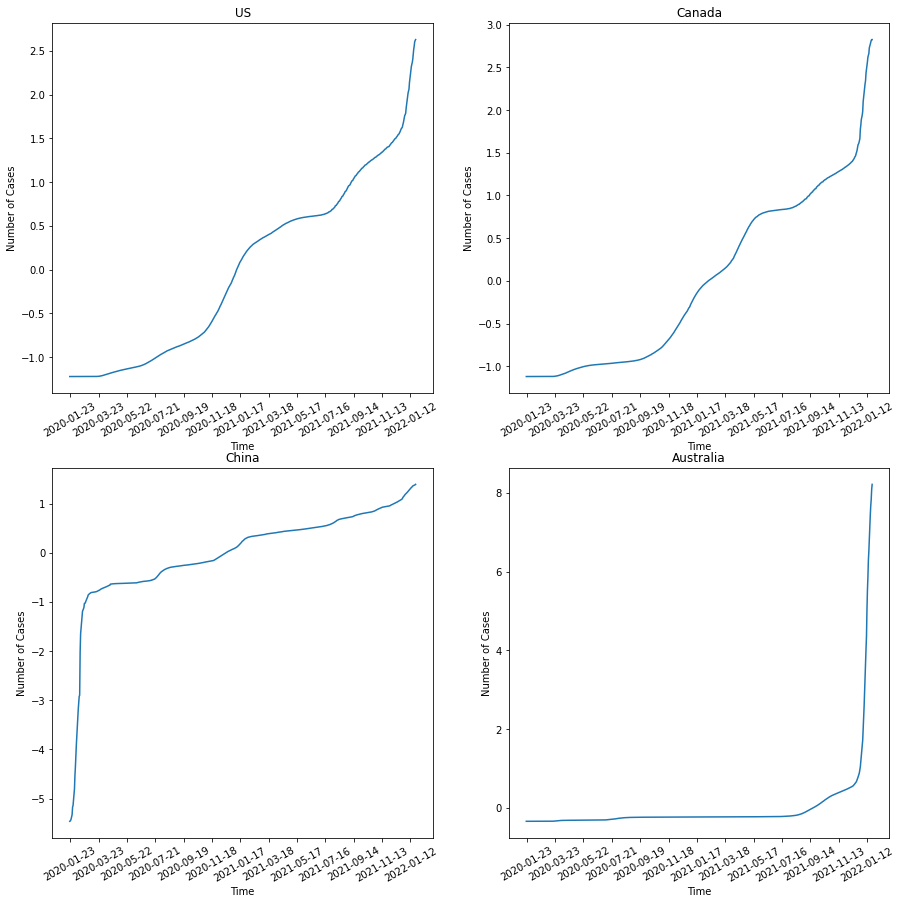

In [ ]:
time_series_plot(scaled_df, top_countries)

The distribution of the data looks similar for both normal data and standardised data. But the difference is the range over which the data is distributed. In the standardised data, the values that are closer to zero indicate that they are closer to the mean. The positive values indicate that the values are greater than the mean, while the negative values indicate that the values are lesser than the mean (located away from the mean).

# Part 2: Applying PCA

In [ ]:
### YOUR CODE HERE ###
C = np.cov(scaled_data1.T)
def get_sorted_eigen(df_cov):
  e_values, e_vectors = np.linalg.eigh(df_cov)
  args = (-e_values).argsort()
  e_values = e_values[args]
  e_vectors = e_vectors[:, args]
  return e_values, e_vectors

In [ ]:
C.shape

(733, 733)

In [ ]:
e_values,e_vectors = get_sorted_eigen(C)

In [ ]:
e_values.shape

(733,)

In [ ]:
e_vectors.shape

(733, 733)

In [ ]:
eigValSum = sum(e_values)
expVar = [eigV/eigValSum*100 for eigV in e_values]
cumExpVar = np.cumsum(expVar)

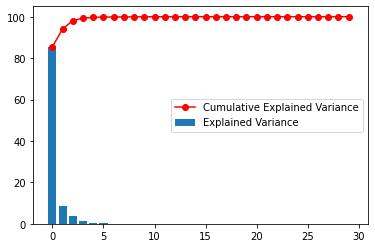

In [ ]:
plt.bar(range(30), expVar[:30], label='Explained Variance')
plt.plot(cumExpVar[:30], 'r-o', label='Cumulative Explained Variance')
plt.legend(loc='center right')
plt.show()

In [ ]:
len(cumExpVar)

733

In [ ]:
cumExpVar[1],cumExpVar[2]

(94.10558679441834, 98.08990311382458)

We need 3 Principal Components (Eigen Vectors)  to cover 98% of the dataset's variance

In [ ]:
df.index[:2]

Index(['2020-01-22', '2020-01-23'], dtype='object')

In [ ]:
months = cases_raw.columns

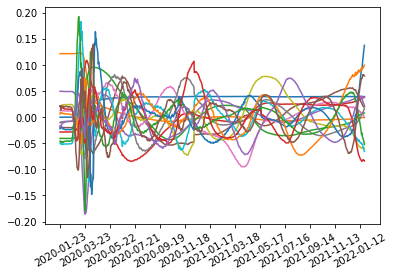

In [ ]:
plt.plot(months, e_vectors[:,0:16])
plt.xticks(np.arange(1,750,step=60))
plt.xticks(rotation=30)
plt.show()

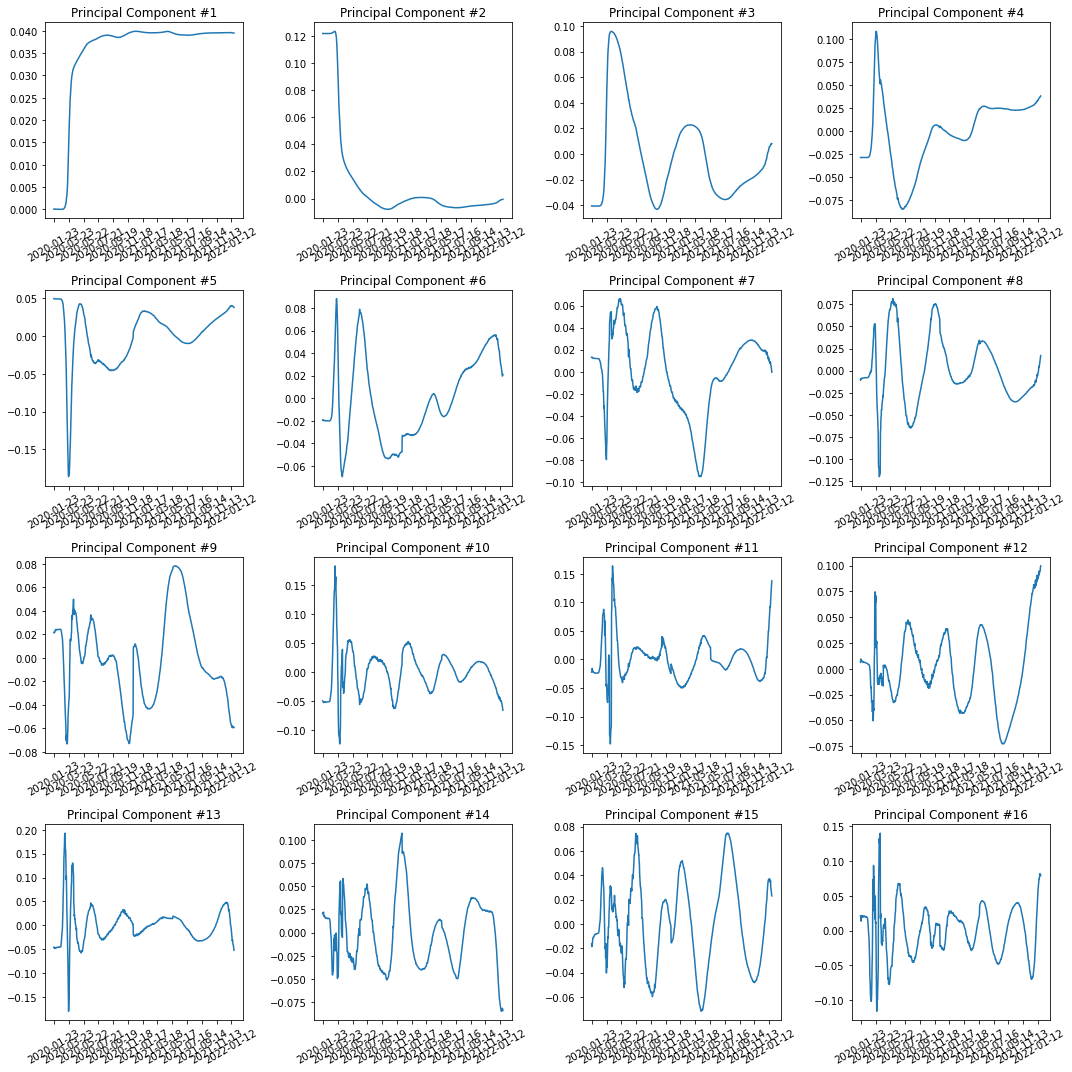

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.plot(months, e_vectors[:,i])
  plt.xticks(np.arange(1,750,step=60))
  plt.xticks(rotation=30)
  plt.tight_layout()
  plt.title('Principal Component #{}'.format(i+1))

The first few PCs have less variations when compared to higher number of PCs. The variance keeps on accumulating as we increase the number of PCs.

# Part 3: Data reconstruction

In [ ]:
import math
def plot_country_figures(original_df, country_name):
  fig1 = plt.figure("Figure 1")
  months  = original_df.columns
  plt.plot(months, original_df.loc[country_name].values.ravel())
  plt.title('Original Time-Series Plot of {}'.format(country_name))
  plt.xticks(np.arange(1,750,step=60))
  plt.xticks(rotation=30)
  plt.xlabel('Time')
  plt.ylabel('Number of Cases')

  scaler2 = StandardScaler()
  scaled_data = scaler2.fit_transform(original_df)
  C = np.cov(scaled_data.T)
  e_values, e_vectors = np.linalg.eigh(C)

  args = (-e_values).argsort()
  e_values = e_values[args]
  e_vectors = e_vectors[:, args]
  print(e_vectors.shape)
  numEvsSet = [1, 2 , 4, 8, 16]
  recon_data = []
  for numEvs in numEvsSet:
    projection = np.dot(scaled_data, e_vectors[:, 0:numEvs])
    reconstruction = (np.dot(projection, e_vectors[:, 0:numEvs].T))
    notscaled_data = scaler2.inverse_transform(reconstruction)
    recon_df = pd.DataFrame(notscaled_data, index=original_df.index, columns=original_df.columns)
    recon_data.append(recon_df.loc[country_name].values.ravel())
  fig2 = plt.figure("Figure 2")
  for i in range (len(recon_data)):
    plt.plot(months,recon_data[i] )
    plt.title('Reconstruction using various PCs - {}'.format(country_name))
    plt.legend(['PC1','PC2','PC4','PC8','PC16'], loc='upper left')
    plt.xlabel('Time')
    plt.ylabel('Number of Cases')
    plt.xticks(np.arange(1,750,step=60))
    plt.xticks(rotation=30)
    

  residual_df = pd.DataFrame()
  residual_df['residual_error'] = (original_df-recon_df).loc[country_name].values.ravel()
  fig3 = plt.figure('Figure 3')
  plt.plot(months,residual_df['residual_error'])
  plt.title('Residual Error - {}'.format(country_name))
  plt.xlabel('Time')
  plt.xticks(np.arange(1,750,step=60))
  plt.xticks(rotation=30)
  plt.ylabel('Error')
  plt.show()

  
  x_list = []
  rmse_list = []
  for i in range(1,101):
    x_list.append(i)
    projection = np.dot(scaled_data, e_vectors[:, 0:i])
    reconstruction = (np.dot(projection, e_vectors[:, 0:i].T))
    #print(reconstruction.shape)
    notscaled_data = scaler2.inverse_transform(reconstruction)
    recon_df2 = pd.DataFrame(notscaled_data, index=original_df.index, columns=original_df.columns)
    MSE = np.square((original_df-recon_df2).loc[country_name].values.ravel()).mean() 
    RMSE = math.sqrt(MSE)
    rmse_list.append(RMSE)
  fig4 = plt.figure('Figure 4')
  plt.plot(x_list, rmse_list)
  plt.title ('RMSE for different principal components - {}'.format(country_name))
  plt.xlabel('Number of principal components')
  plt.ylabel('RMSE')
  plt.show()


(733, 733)


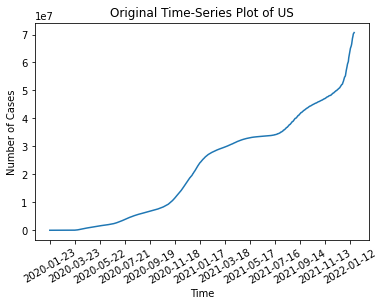

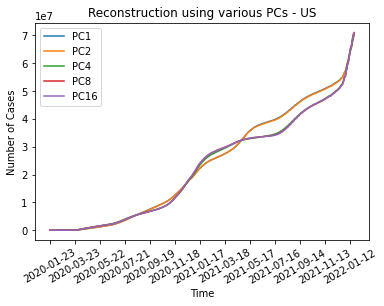

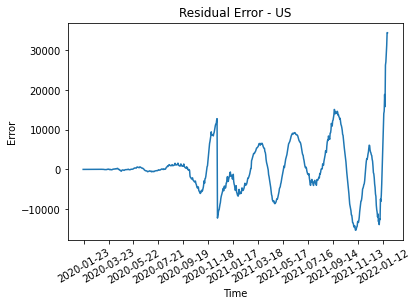

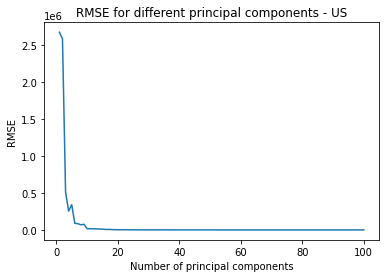

(733, 733)


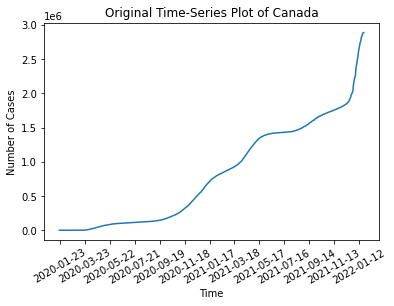

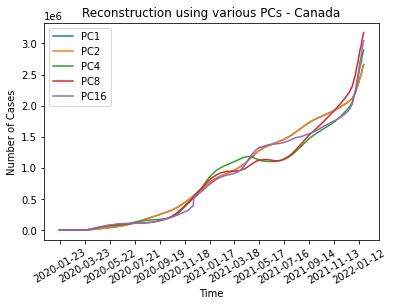

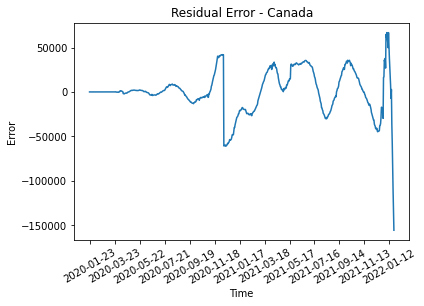

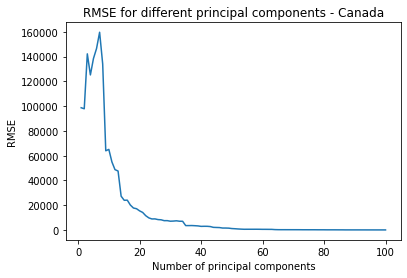

(733, 733)


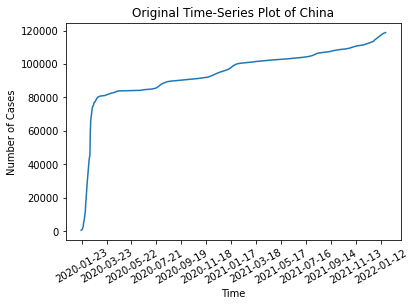

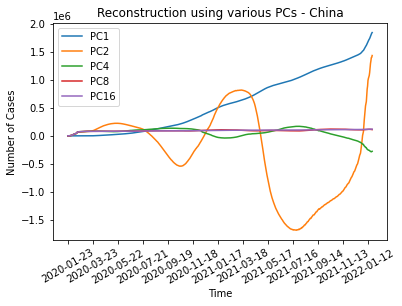

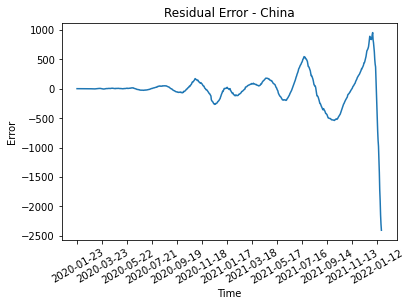

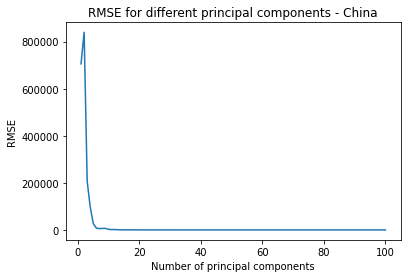

In [ ]:
plot_country_figures(cases_raw,'US')
plot_country_figures(cases_raw,'Canada')
plot_country_figures(cases_raw,'China')

# Part 4: SVD



In [ ]:
import math
def plot_country_figures_SVD(original_df, country_name):
  fig1 = plt.figure("Figure 1")
  months  = original_df.columns
  plt.plot(months, original_df.loc[country_name].values.ravel())
  plt.title('Original Time-Series Plot of {}'.format(country_name))
  plt.xticks(np.arange(1,750,step=60))
  plt.xticks(rotation=30)
  plt.xlabel('Time')
  plt.ylabel('Number of Cases')

  X = original_df.to_numpy()
  n, p = X.shape
  #print(n,p)
  mu = X.mean(axis=0)
  X = X - mu # standardising data
  U, S, Vt = np.linalg.svd(X)
  #print(Vt.shape)
  V = Vt.T
  e_vectors = V
  e_values = []
  for item in S:
    e_values.append(item**2)
  e_values = np.array(e_values)
  #print(e_vectors.shape,e_values.shape)
  numEvsSet = [1, 2 , 4, 8, 16]
  recon_data_svd = []
  for numEvs in numEvsSet:
     projection = np.dot(X, e_vectors[:, 0:numEvs])
     reconstruction = (np.dot(projection, e_vectors[:, 0:numEvs].T) + mu)
     #print(reconstruction.shape)
     recon_df_svd = pd.DataFrame(reconstruction, index=original_df.index, columns=original_df.columns)
     recon_data_svd.append(recon_df_svd.loc[country_name].values.ravel())
  fig2 = plt.figure("Figure 2")
  #print(len(recon_data))
  for i in range (len(recon_data_svd)):
    plt.plot(months,recon_data_svd[i], )
    plt.title('Reconstruction using various PCs - {}'.format(country_name))
    plt.legend(['PC1','PC2','PC4','PC8','PC16'], loc='upper left')
    plt.xlabel('Time')
    plt.ylabel('Number of Cases')
    plt.xticks(np.arange(1,750,step=60))
    plt.xticks(rotation=30)
    

  residual_df = pd.DataFrame()
  residual_df['residual_error'] = (original_df-recon_df_svd).loc[country_name].values.ravel()
  fig3 = plt.figure('Figure 3')
  plt.plot(months,residual_df['residual_error'])
  plt.title('Residual Error - {}'.format(country_name))
  plt.xlabel('Time')
  plt.xticks(np.arange(1,750,step=60))
  plt.xticks(rotation=30)
  plt.ylabel('Error')
  plt.show()

  
  x_list = []
  rmse_list = []
  for i in range(1,101):
    x_list.append(i)
    projection = np.dot(X, e_vectors[:, 0:i])
    reconstruction = (np.dot(projection, e_vectors[:, 0:i].T) + mu)
    recon_df2_svd = pd.DataFrame(reconstruction, index=original_df.index, columns=original_df.columns)
    MSE = np.square((original_df-recon_df2_svd).loc[country_name].values.ravel()).mean() 
    RMSE = math.sqrt(MSE)
    rmse_list.append(RMSE)
  fig4 = plt.figure('Figure 4')
  plt.plot(x_list, rmse_list)
  plt.title ('RMSE for different principal components - {}'.format(country_name))
  plt.xlabel('Number of principal components')
  plt.ylabel('RMSE')
  plt.show()
### YOUR CODE HERE ###

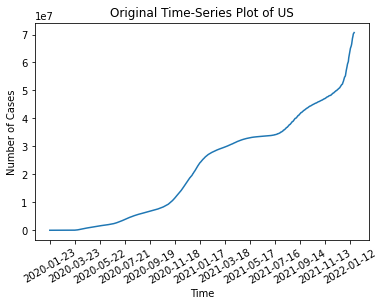

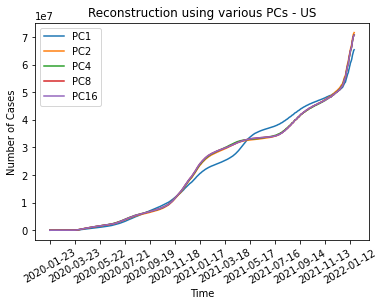

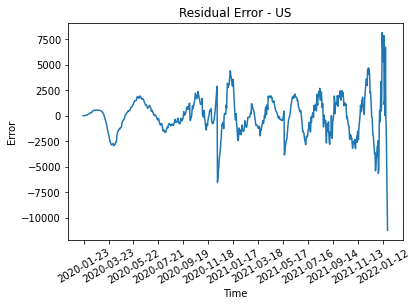

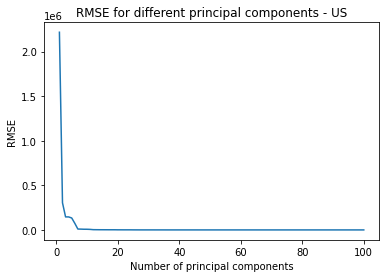

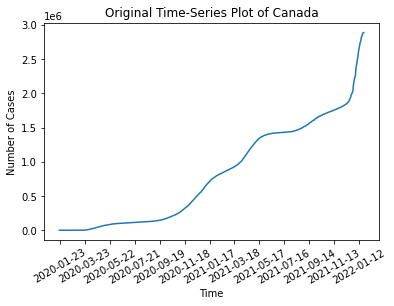

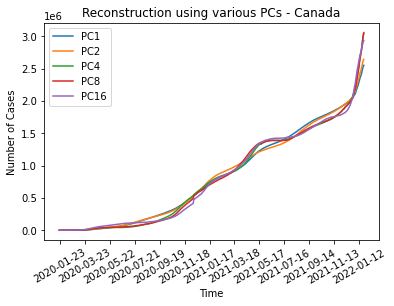

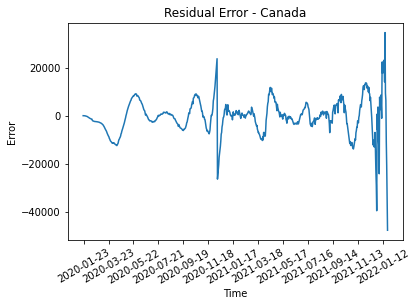

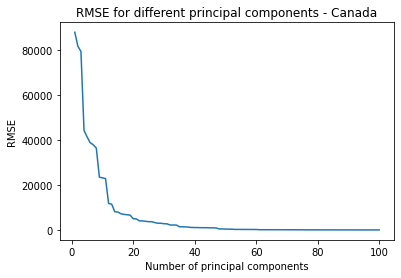

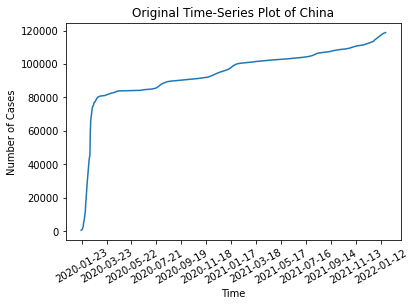

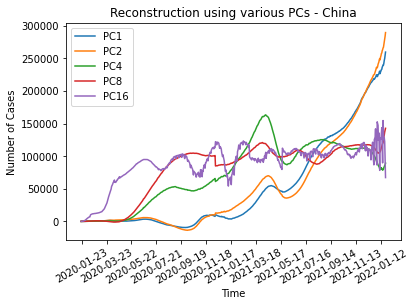

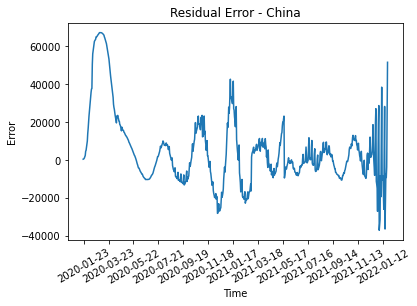

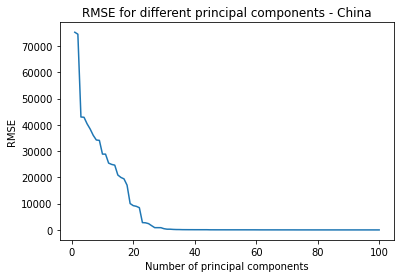

In [ ]:
plot_country_figures_SVD(cases_raw,'US')
plot_country_figures_SVD(cases_raw,'Canada')
plot_country_figures_SVD(cases_raw,'China')

In [ ]:
def comparison(original_df,country_name):
  fig1 = plt.figure("Figure 1")
  months  = original_df.columns
  plt.plot(months, original_df.loc[country_name].values.ravel())
  plt.title('Original Time-Series Plot of {}'.format(country_name))
  plt.xticks(np.arange(1,750,step=60))
  plt.xticks(rotation=30)
  plt.xlabel('Time')
  plt.ylabel('Number of Cases')

  #PCA
  scaler2 = StandardScaler()
  scaled_data = scaler2.fit_transform(original_df)
  C = np.cov(scaled_data.T)
  e_values1, e_vectors1 = np.linalg.eigh(C)
  args = (-e_values1).argsort()
  e_values1 = e_values1[args]
  e_vectors1 = e_vectors1[:, args]
  print(e_vectors1.shape)
  projection1 = np.dot(scaled_data, e_vectors1[:, 0:16])
  reconstruction1 = (np.dot(projection1, e_vectors1[:, 0:16].T))
  notscaled_data = scaler2.inverse_transform(reconstruction1)
  recon_df = pd.DataFrame(notscaled_data, index=original_df.index, columns=original_df.columns)

  #SVD
  X = original_df.to_numpy()
  n, p = X.shape
  mu = X.mean(axis=0)
  X = X - mu # standardising data
  U, S, Vt = np.linalg.svd(X)
  V = Vt.T
  e_vectors = V
  e_values = []
  for item in S:
    e_values.append(item**2)
  e_values = np.array(e_values)
  projection = np.dot(X, e_vectors[:, 0:16])
  reconstruction = (np.dot(projection, e_vectors[:, 0:16].T) + mu)
  recon_df_svd = pd.DataFrame(reconstruction, index=original_df.index, columns=original_df.columns)

  fig2 = plt.figure("Figure 2")
  plt.plot(months,recon_df.loc[country_name].values.ravel())
  plt.plot(months,recon_df_svd.loc[country_name].values.ravel())
  plt.title('Reconstruction using 16 PCs - {}'.format(country_name))  
  plt.legend(['PCA','SVD'], loc='upper left')
  plt.xlabel('Time')
  plt.ylabel('Number of Cases')
  plt.xticks(np.arange(1,750,step=60))
  plt.xticks(rotation=30)

  #Residual Error
  residual_df = pd.DataFrame()
  residual_df['residual_error'] = (original_df-recon_df).loc[country_name].values.ravel()
  residual_df_svd = pd.DataFrame()
  residual_df_svd['residual_error'] = (original_df-recon_df_svd).loc[country_name].values.ravel()
  fig3 = plt.figure('Figure 3')
  plt.plot(months,residual_df['residual_error'])
  plt.plot(months,residual_df_svd['residual_error'])
  plt.title('Residual Error - {}'.format(country_name))
  plt.legend(['PCA','SVD'], loc='upper left')
  plt.xlabel('Time')
  plt.xticks(np.arange(1,750,step=60))
  plt.xticks(rotation=30)
  plt.ylabel('Error')

  #RMSE
  x_list = []
  rmse_list = []
  for i in range(1,101):
    x_list.append(i)
    projection1 = np.dot(scaled_data, e_vectors1[:, 0:i])
    reconstruction1 = (np.dot(projection1, e_vectors1[:, 0:i].T))
    notscaled_data = scaler2.inverse_transform(reconstruction1)
    recon_df2 = pd.DataFrame(notscaled_data, index=original_df.index, columns=original_df.columns)
    MSE = np.square((original_df-recon_df2).loc[country_name].values.ravel()).mean() 
    RMSE = math.sqrt(MSE)
    rmse_list.append(RMSE)

  x_list_svd = []
  rmse_list_svd = []
  for i in range(1,101):
    x_list_svd.append(i)
    projection = np.dot(X, e_vectors[:, 0:i])
    reconstruction = (np.dot(projection, e_vectors[:, 0:i].T) + mu)
    recon_df2_svd = pd.DataFrame(reconstruction, index=original_df.index, columns=original_df.columns)
    MSE = np.square((original_df-recon_df2_svd).loc[country_name].values.ravel()).mean() 
    RMSE = math.sqrt(MSE)
    rmse_list_svd.append(RMSE)
  fig4 = plt.figure('Figure 4')
  plt.plot(x_list, rmse_list)
  plt.plot(x_list_svd, rmse_list_svd)
  plt.legend(['PCA','SVD'], loc='upper left')
  plt.title ('RMSE for different principal components - {}'.format(country_name))
  plt.xlabel('Number of principal components')
  plt.ylabel('RMSE')
  plt.show()

(733, 733)


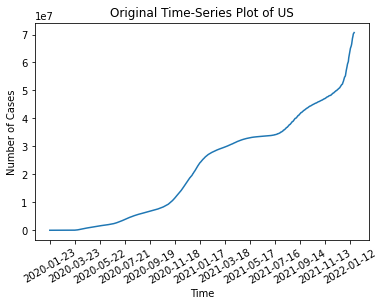

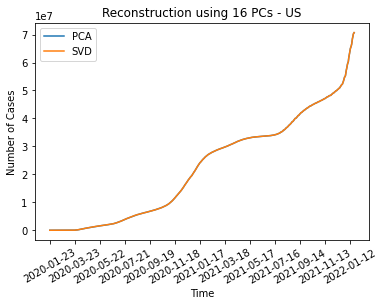

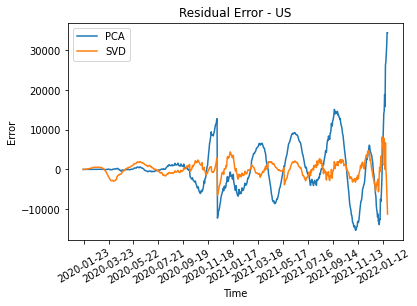

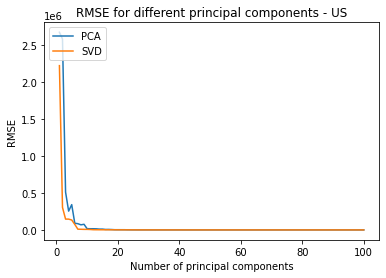

(733, 733)


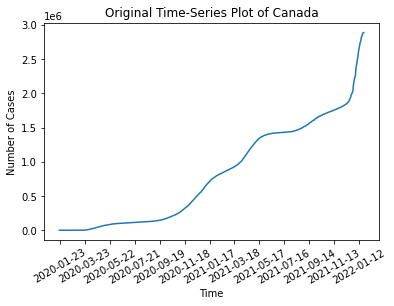

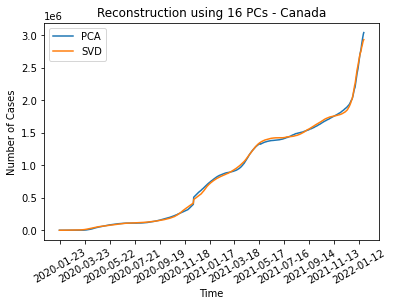

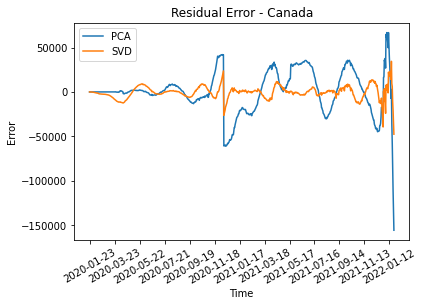

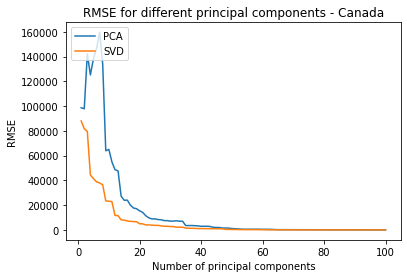

(733, 733)


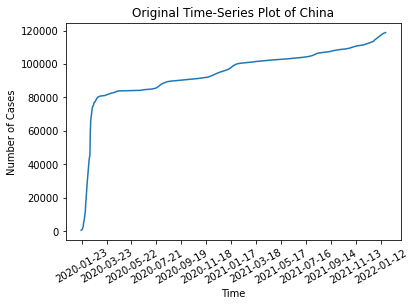

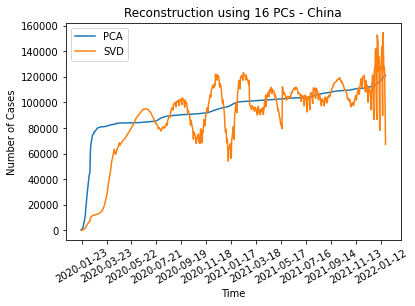

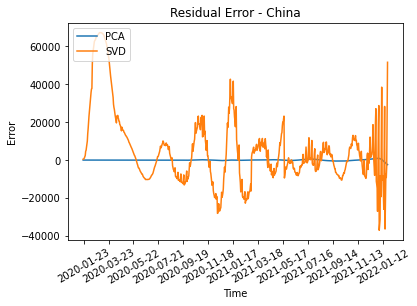

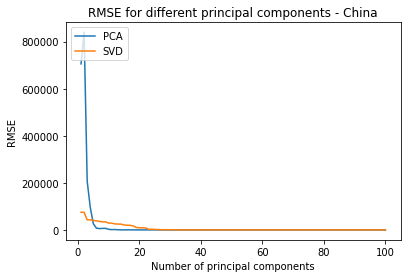

In [ ]:
comparison(cases_raw,'US')
comparison(cases_raw,'Canada')
comparison(cases_raw,'China')

Covariance and Standardisation computations are not needed for Singular Value Decomposition (SVD). But we need to centre the data (X). If X is centered then this is equivalent to standard PCA done via covariance matrix. But if not, then it's equivalent to the "non-centered" PCA.

# Part 5: Fashion-MNIST dataset


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
X = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

In [ ]:
import numpy as np

In [ ]:
X.shape

(1000, 784)

In [ ]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.shape

(1000,)

In [ ]:
X_arr = X.to_numpy()

Label is: Ankle boot


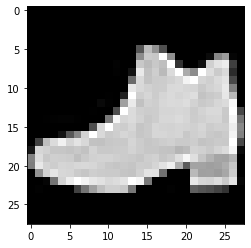

In [ ]:
import matplotlib.pyplot as plt 
plt.gray() 
ind = 15
plt.imshow(X.loc[ind].values.reshape(28,28)) 
print ("Label is:", target_encoding[int(y[ind])])
plt.show() 

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_arr[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

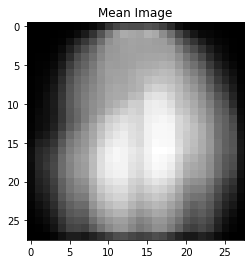

In [ ]:
meanImage = np.reshape(X_arr.mean(axis=0), (28,28))
plt.imshow(meanImage, cmap=plt.cm.gray)
plt.title('Mean Image')
plt.show()

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
y_arr = y.to_numpy()

In [ ]:
ind_list = []

In [ ]:
def categories_split(cat_list, y, ind_list):
  for item in cat_list:
    result = np.where( y == item)
    ind_list.append(result[0].tolist())
  return ind_list

In [ ]:
cat_list = ['1','6','7']
ind_l = categories_split(cat_list,y_arr,ind_list)

In [ ]:
y_ind = []
for index in ind_l:
  for item in index:
    y_ind.append(item)

In [ ]:
X_new = []
y_new = []
for i in y_ind:
  X_new.append(X_arr[i])
  y_new.append(y_arr[i])

In [ ]:
X_new = np.array(X_new)
y_new = np.array(y_new)

In [ ]:
X_new.shape

(319, 784)

In [ ]:
y_new.shape

(319,)

In [ ]:
U, S, Vt = np.linalg.svd(X_new)
print(U.shape, S.shape, Vt.shape)
V = Vt.T
e_vectors = V
e_values = []
for item in S:
  e_values.append(item**2)
e_values = np.array(e_values)
args = (-e_values).argsort()
e_values = e_values[args]
e_vectors = e_vectors[:, args]
print(e_vectors.shape,e_values.shape)

(319, 319) (319,) (784, 784)
(784, 319) (319,)


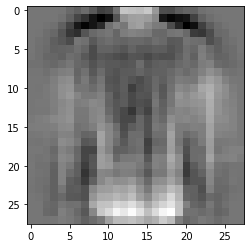

In [ ]:
plt.imshow(e_vectors[:, 8].reshape(28, 28), cmap = plt.cm.gray)


Plotting First 10 eigen vectors

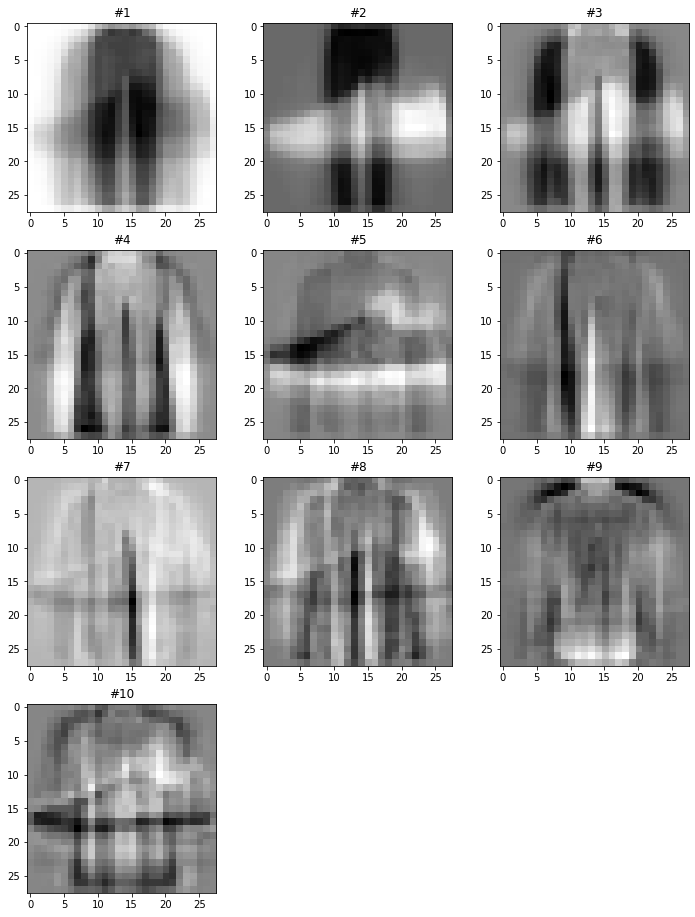

In [ ]:
COUNT = 10
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(e_vectors[:, i].reshape(-1, 28), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

In [ ]:
def img_plot(n,e_vectors,X, y):
  rnd_idx = np.random.choice(len(X))
  img = X[rnd_idx]
  img_name = y[rnd_idx]
  print('Image Category: '+ target_encoding[int(img_name)])
  #print(img.shape)
  fig1 = plt.figure('Figure 1')
  plt.imshow(img.reshape(-1, 28), cmap = plt.cm.gray)
  plt.title('Original Image')
  plt.show()

  x_list = []
  ROWS = math.ceil (n/3)
  fig2 = plt.figure('Figure 2',figsize=(35,35))
  for i in range(1,n+1):
    x_list.append(i)
    projection = np.dot(img, e_vectors[:, 0:i])
    reconstruction = (np.dot(projection, e_vectors[:, 0:i].T))
    #print(reconstruction.shape,projection.shape)
    plt.subplot(ROWS, 8, i)
    plt.imshow(reconstruction.reshape(28, 28), cmap = plt.cm.gray)
    plt.title('Reconstruction: {}Components'.format(i))
    plt.tight_layout()


Image Category: Trouser


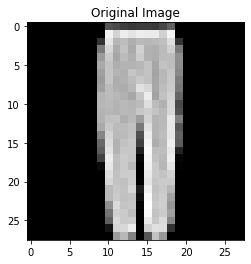

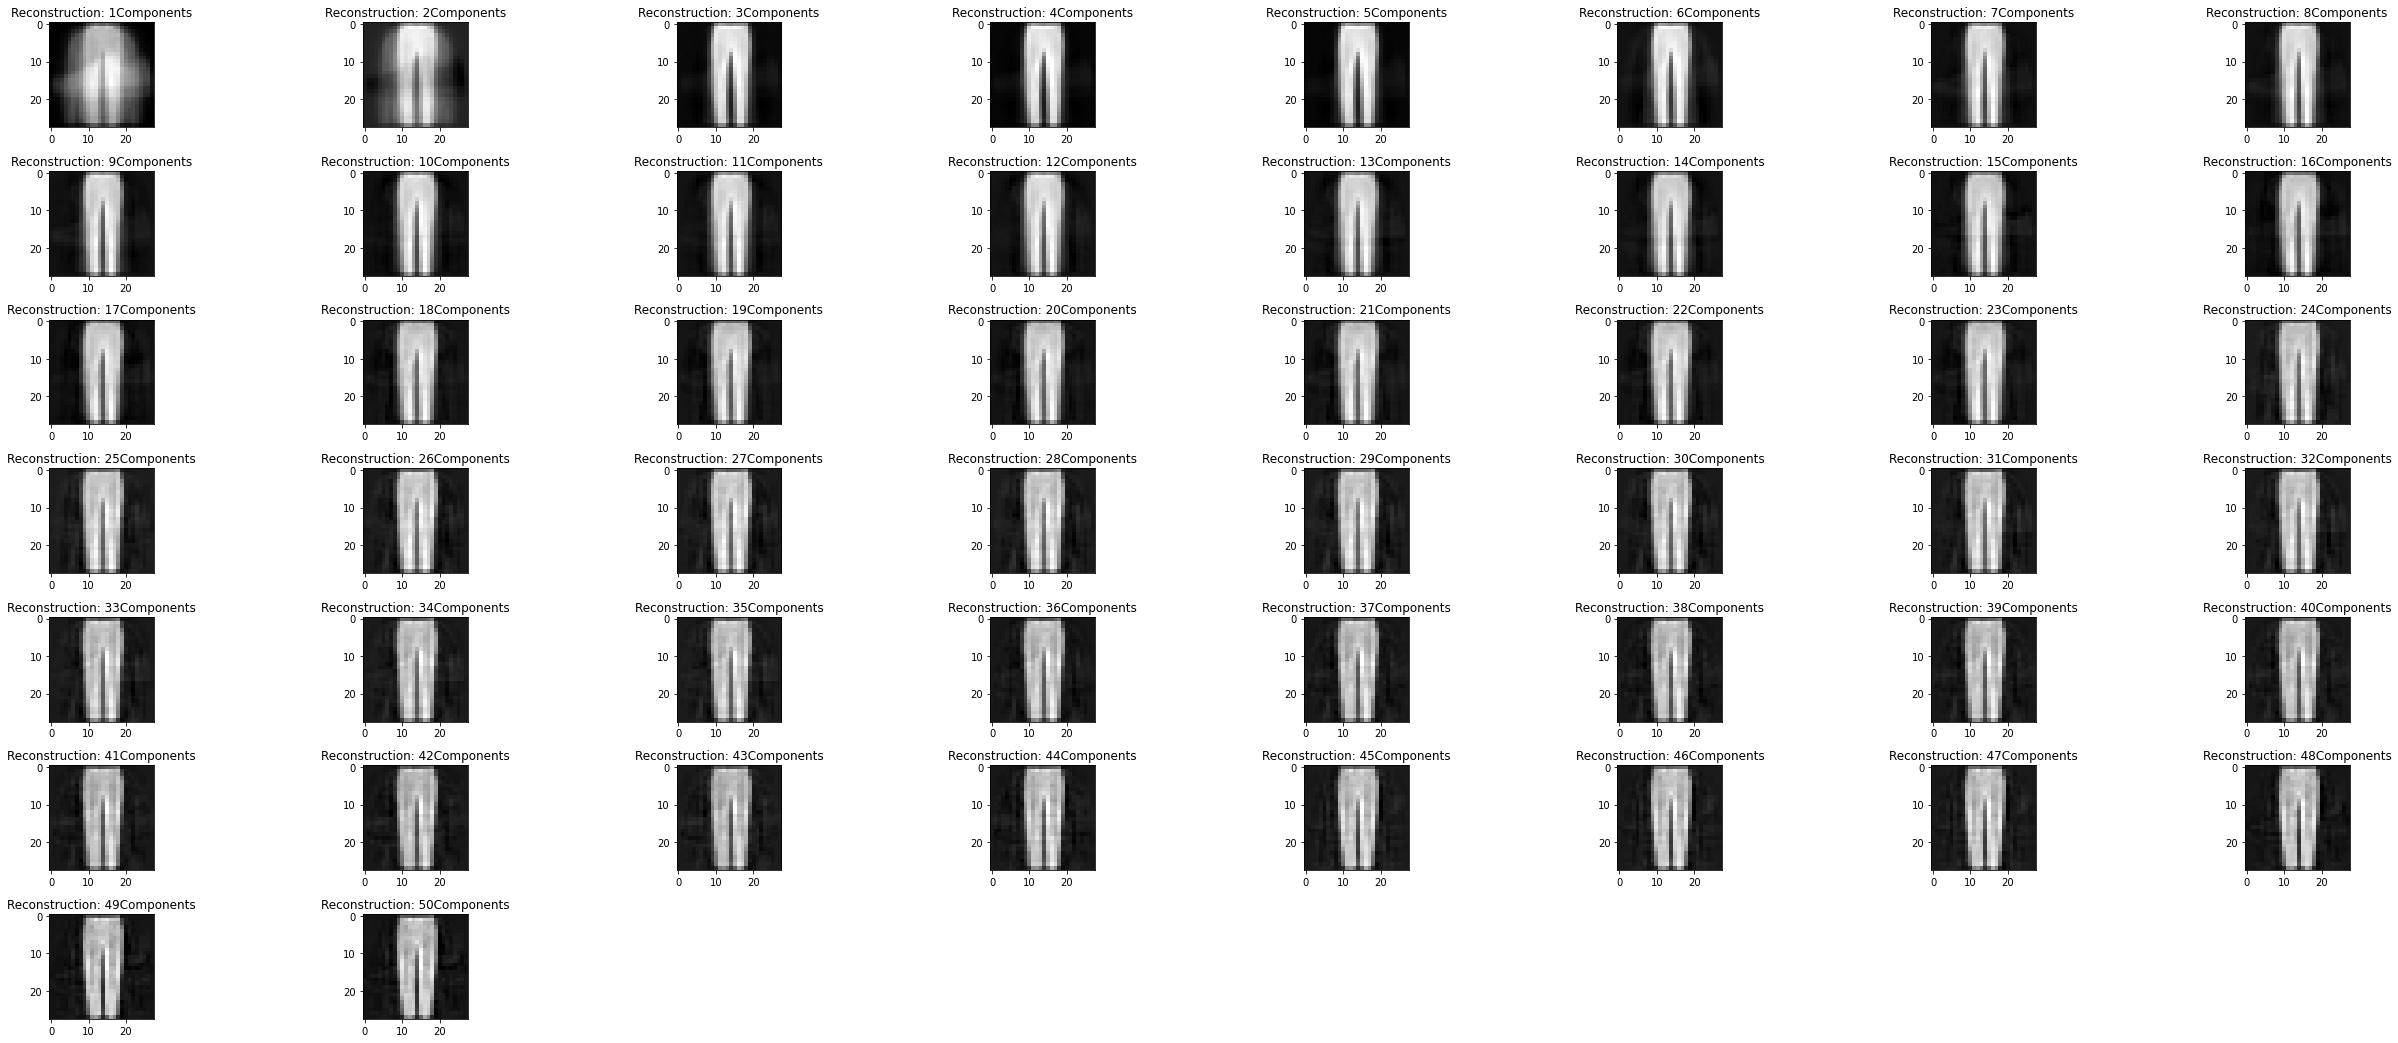

In [ ]:
img_plot(50,e_vectors,X_new, y_new)

Image Category: Sneaker


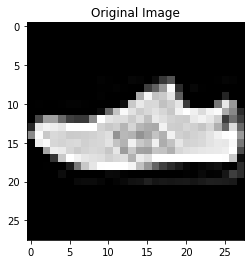

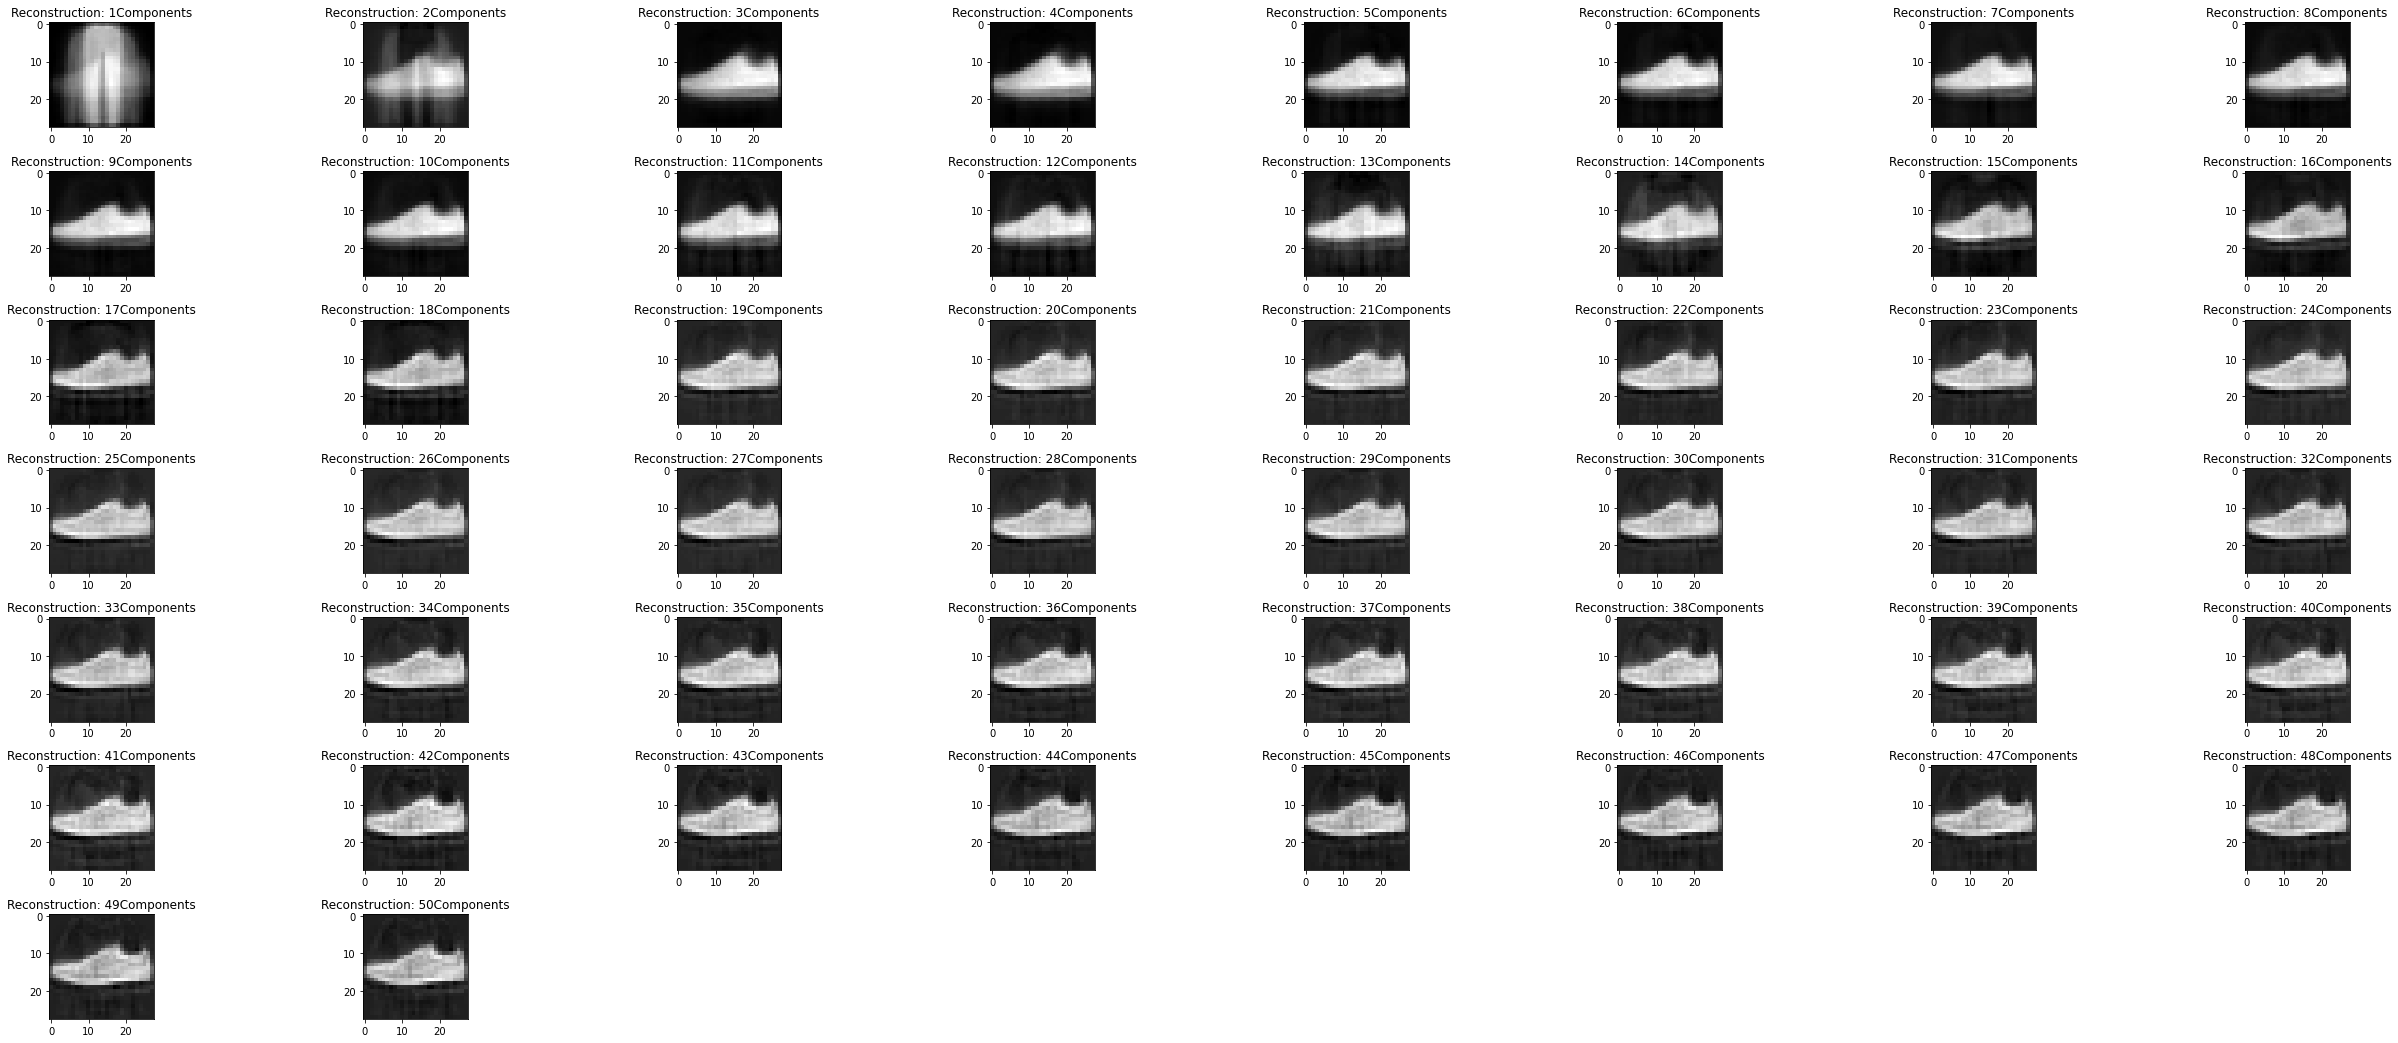

In [ ]:
img_plot(50,e_vectors,X_new, y_new)

Image Category: Shirt


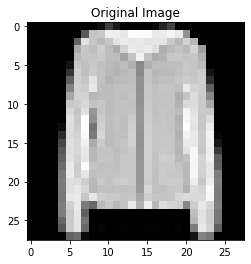

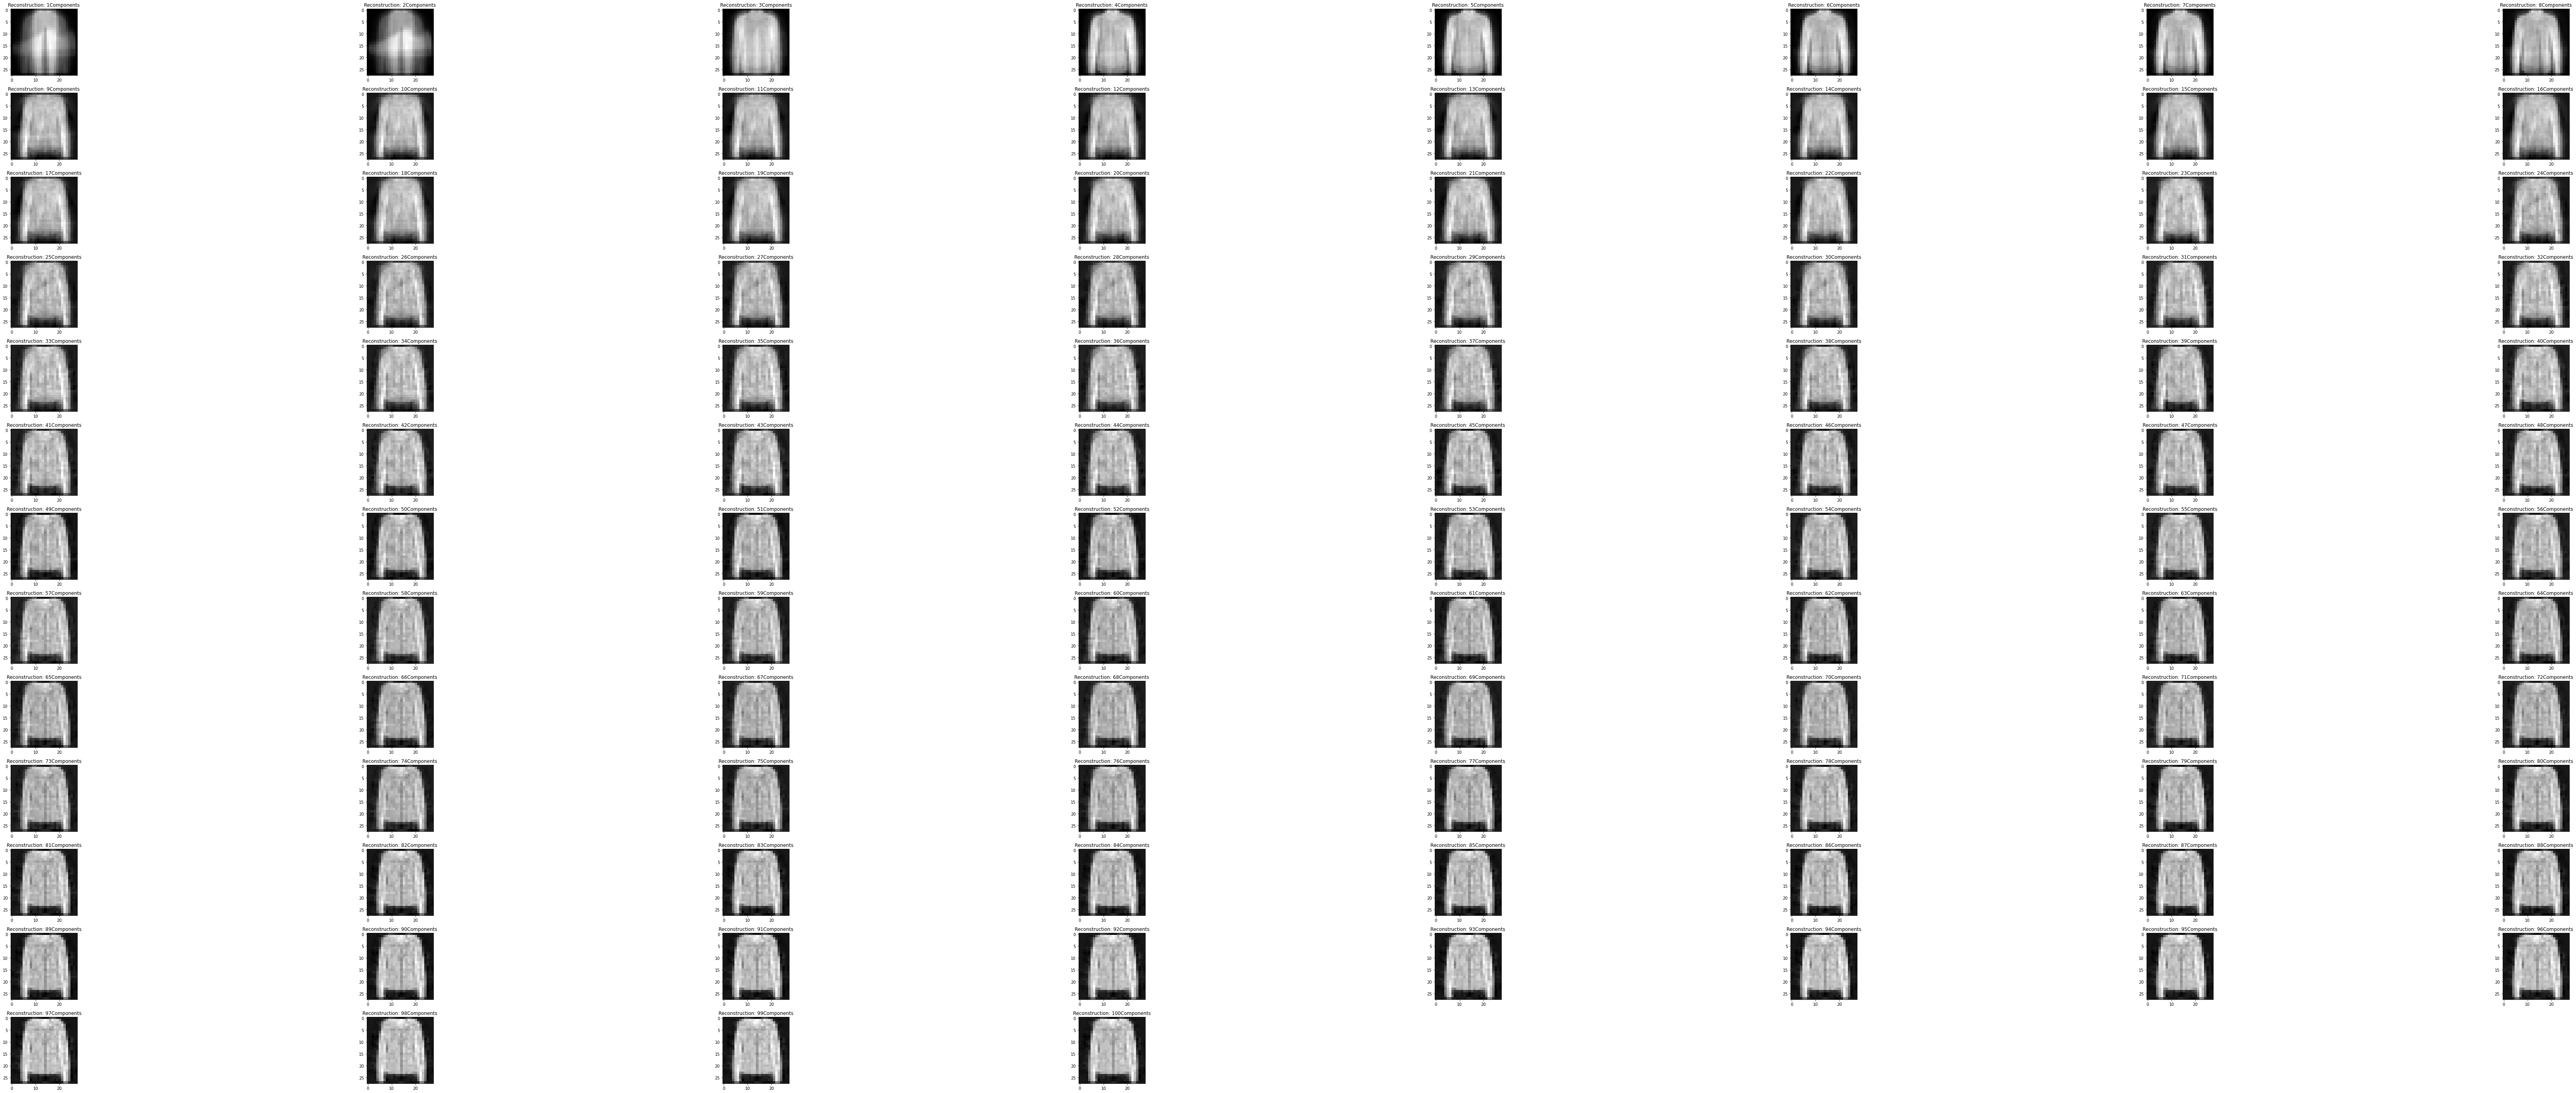

In [ ]:
img_plot(100,e_vectors,X_new, y_new)

In [ ]:
def img_plot_2(e_vectors,X, y):
  rnd_idx = np.random.choice(len(X))
  img = X[rnd_idx]
  img_name = y[rnd_idx]
  print('Image Category: '+ target_encoding[int(img_name)])
  #print(img.shape)
  fig1 = plt.figure('Figure 1')
  plt.imshow(img.reshape(-1, 28), cmap = plt.cm.gray)
  plt.title('Original Image')
  plt.show()

  x_list = []
  fig2 = plt.figure('Figure 2',figsize=(15,15))
  PC_list = [50,100,150,200,250,300,350,400]
  for i in range(len(PC_list)):
    x_list.append(i)
    projection = np.dot(img, e_vectors[:, 0:PC_list[i]])
    reconstruction = (np.dot(projection, e_vectors[:, 0:PC_list[i]].T))
    #print(reconstruction.shape,projection.shape)
    plt.subplot(3, 3, i+1)
    plt.imshow(reconstruction.reshape(28, 28), cmap = plt.cm.gray)
    plt.title('Reconstruction: {}Components'.format(PC_list[i]))
    plt.tight_layout()


Image Category: Shirt


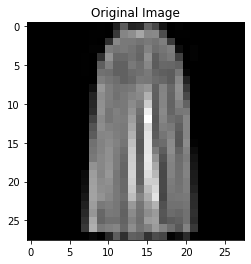

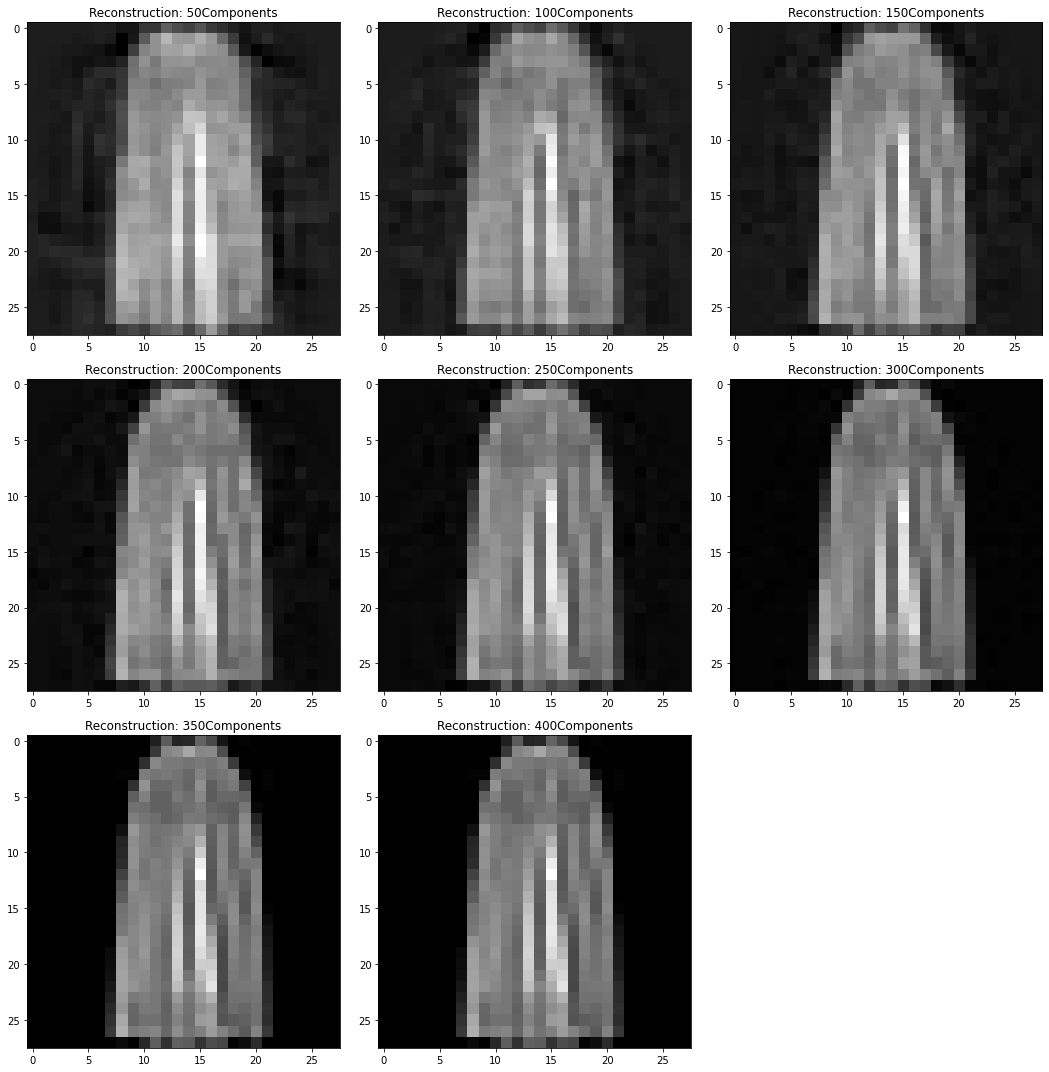

In [ ]:
img_plot_2(e_vectors,X_new, y_new)

Approximately 150 components are required so that we (humans!) can identify the items

In [ ]:
compression_ratio = (1000*784)/(150000+117600)

In [ ]:
compression_ratio

2.929745889387145